# Random Forest for Fraud Check

In [56]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [57]:
#Load the dataset
fraudcheck_data = pd.read_csv('C:\Data Science\Assignments\Decision Tree\Fraud_check.csv')
fraudcheck_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [58]:
fraudcheck_data.shape

(600, 6)

In [59]:
#Check for missing values
fraudcheck_data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [60]:
# Let's see how many unique categories we have in this property - occupation
undergrad_set = set(fraudcheck_data['Undergrad'])
print(undergrad_set)

Marital_set = set(fraudcheck_data['Marital.Status'])
print(Marital_set)

Urban_set = set(fraudcheck_data['Urban'])
print(Urban_set)

{'NO', 'YES'}
{'Divorced', 'Single', 'Married'}
{'NO', 'YES'}


In [61]:
fraudcheck_data['Taxable.Income'].describe

<bound method NDFrame.describe of 0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64>

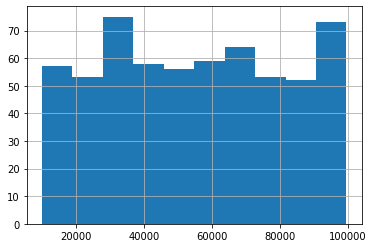

In [62]:
#Histogram of Taxable income
#hist.fraudcheck_data['Taxable.Income']
#fraudcheck_data['Taxable.Income'].plot(kind='box', subplots=True, layout=(3,3), sharex=True, sharey=True)
fraudcheck_data['Taxable.Income'].hist()

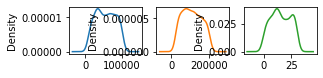

In [63]:
from pandas.plotting import scatter_matrix
#2D Density plot, contors-plot
#sns.jointplot(x="Taxable.Income", y="class", data=fraudcheck_data, kind="kde");
#plt.show();
fraudcheck_data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False)
#scatter_matrix(fraudcheck_data)
plt.show()

In [64]:
# Add a new column named 'Class' 
fraudcheck_data['class'] = ['Good' if x > 30000 else 'Risky' for x in fraudcheck_data['Taxable.Income']] 

# Print the DataFrame 
print(fraudcheck_data['class'])

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: class, Length: 600, dtype: object


In [65]:
#How many Risky cases as how many good cases
fraudcheck_data['class'].value_counts()

Good     476
Risky    124
Name: class, dtype: int64

In [66]:
fraudcheck_data['Taxable.Income'].describe()
#fraudcheck_data.head()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [67]:
#fraudcheck_data[fraudcheck_data['Undergrad'].isnull()]
# Now we classify them as integers instead of their names.
fraudcheck_data['Undergrad'] = fraudcheck_data['Undergrad'].map({'NO': 0, 'YES': 1}).astype(int)
print(fraudcheck_data['Undergrad'])

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32


In [68]:
fraudcheck_data['Urban'] = fraudcheck_data['Urban'].map({'NO': 0, 'YES': 1}).astype(int)
print(fraudcheck_data['Urban'])

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32


In [69]:
# Now we classify them as integers instead of their names.
fraudcheck_data['Marital.Status'] = fraudcheck_data['Marital.Status'].map({'Single': 0, 'Married': 1, 'Divorced':2 }).astype(int)
print(fraudcheck_data['Marital.Status'])

0      0
1      2
2      1
3      0
4      1
      ..
595    2
596    2
597    2
598    1
599    2
Name: Marital.Status, Length: 600, dtype: int32


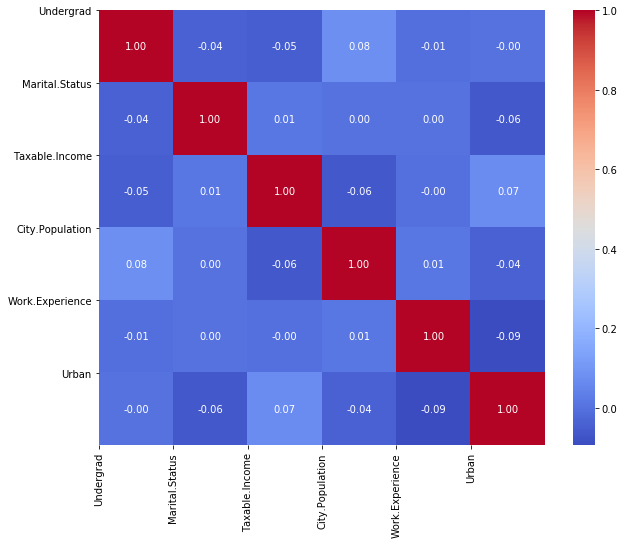

In [70]:
#Data Visualization
corr = fraudcheck_data.corr()

#Plot
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [71]:
#Feature Scaling
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

# separate array into input and output components, skip Taxable Income as we have created/derived separate class out of it
X = fraudcheck_data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']].values
Y = fraudcheck_data['class'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
set_printoptions(precision=3)
print(X_train[0:11,:])
print(X_test[0:11,:])

[[ 0.958  0.035  1.433  0.478 -1.01 ]
 [-1.044  0.035 -0.497 -1.759  0.991]
 [-1.044  0.035  0.944 -0.529  0.991]
 [ 0.958 -1.182  0.372  0.478  0.991]
 [-1.044  1.252  1.867 -1.536  0.991]
 [-1.044 -1.182 -1.048 -0.641 -1.01 ]
 [ 0.958  1.252 -1.148 -0.864 -1.01 ]
 [-1.044  1.252  0.242 -0.529 -1.01 ]
 [ 0.958  0.035 -1.51  -0.976  0.991]
 [ 0.958 -1.182  1.052  0.59  -1.01 ]
 [ 0.958 -1.182  0.394 -1.536 -1.01 ]]
[[ 0.958 -1.182  1.541 -0.305  0.991]
 [ 0.958 -1.182  0.694 -0.976 -1.01 ]
 [-1.044 -1.182  1.914  1.149  0.991]
 [ 0.958  1.252  0.146 -0.193 -1.01 ]
 [-1.044 -1.182 -0.277  0.814 -1.01 ]
 [-1.044  1.252 -0.448 -0.193 -1.01 ]
 [-1.044 -1.182  1.199 -0.529  0.991]
 [-1.044  1.252 -0.637  1.373  0.991]
 [-1.044  1.252  0.22   0.59  -1.01 ]
 [ 0.958  1.252  0.271 -1.088 -1.01 ]
 [ 0.958 -1.182 -0.812 -0.305  0.991]]


In [72]:
#Random Forest
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Random Forest clssifer: it is a ensemble of Decision tree 
rf = RandomForestClassifier(random_state=10) # n_estimator number of tree in the forest 
rf.fit(X_train,y_train) #fitting the random forest model 
y_pred = rf.predict(X_test)


   
#Printing Random Forest Attributes
print("How many Decision Trees",len(rf.estimators_))
print("No of Features",rf.n_features_)
print("Feature Importance",rf.feature_importances_)
print("No of Outputs when fit performed",rf.n_outputs_)



rfscoreT = rf.score(X_train,y_train) #doing the accuracy of the train model 
print("RF train Accuracy", rfscoreT)

rfscore = rf.score(X_test,y_test) #doing the accuracy of the test model 
print("RF Test Accuracy", rfscore)

cn = confusion_matrix(y_test, y_pred)
print("RF Confusion", cn)
print("************************")

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

How many Decision Trees 100
No of Features 5
Feature Importance [0.036 0.065 0.523 0.335 0.041]
No of Outputs when fit performed 1
RF train Accuracy 1.0
RF Test Accuracy 0.7277777777777777
RF Confusion [[131  15]
 [ 34   0]]
************************

[0.833 0.833 0.833 0.722 0.833 0.778 0.722 0.722 0.778 0.778]

0.7833333333333333

0.04614791034954488


In [73]:
#Decicing on the Best Hyper Parameters for RandomForest using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create a RandomForest
est = RandomForestClassifier(n_jobs=-1, random_state=10)

# Create a dictionary of all the parameter options 
rf_p_dist={'max_depth':[3,4,5,6,7,8,9,10,None],
           'n_estimators':[100,200,300,400],
           'max_features':randint(1,5),
           'criterion':['gini','entropy'],
           'bootstrap':[True,False],
           'oob_score':[False,True],
           'min_samples_leaf':randint(1,6)}


#Function to get different Hyperparameters using RandomizedSearchCV
def hypertuning_rscv(est, p_distr, nbr_iter, X,Y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr, n_jobs=-1, n_iter=nbr_iter, cv=10)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

#Calling the function 
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train,y_train)

# View The Best Parameters
print('Best Parameters:', rf_parameters)
print(); print("best Score:", rf_ht_score)


Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 300, 'oob_score': False}

best Score: 0.7904761904761906


In [74]:
#Finalize Best Model with the best hyperparameters
classifier=RandomForestClassifier(n_jobs=-1, bootstrap=False, criterion='entropy', 
                                  max_depth=7, max_features=3, min_samples_leaf=5,
                                  n_estimators=300,oob_score=False,random_state=10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cn = confusion_matrix(y_test, y_pred)

score = classifier.score(X_test,y_test)
print("Model Test Accuracy", score)

score1 = classifier.score(X_train,y_train)
print("Model Train Accuracy", score1)

print("Confusion Matrix", cn)

#Printing Random Forest Attributes
print("How many Decision Trees",len(classifier.estimators_))
print("No of Features",classifier.n_features_)
print("Feature Importance",classifier.feature_importances_)


# Use Cross Validation To Evaluate Model
cross_val = cross_val_score(classifier, X_test, y_test, cv=10, scoring='accuracy')
print(); print(cross_val)
print(); print(cross_val.mean())
print(); print(cross_val.std())

##Observations
####The accuracy of this model has improved from 78.3% to 80#


Model Test Accuracy 0.8
Model Train Accuracy 0.819047619047619
Confusion Matrix [[143   3]
 [ 33   1]]
How many Decision Trees 300
No of Features 5
Feature Importance [0.047 0.063 0.477 0.338 0.074]

[0.722 0.833 0.833 0.778 0.833 0.833 0.778 0.778 0.778 0.778]

0.7944444444444445

0.035572912430182506


[Text(509.63818359375, 509.625, 'X[2] <= 0.72\nentropy = 0.75\nsamples = 420\nvalue = [330, 90]'),
 Text(277.0927734375, 441.675, 'X[3] <= -0.025\nentropy = 0.792\nsamples = 311\nvalue = [237, 74]'),
 Text(117.703125, 373.725, 'X[1] <= -0.574\nentropy = 0.704\nsamples = 157\nvalue = [127, 30]'),
 Text(65.390625, 305.775, 'X[3] <= -0.249\nentropy = 0.48\nsamples = 58\nvalue = [52, 6]'),
 Text(52.3125, 237.825, 'X[2] <= 0.093\nentropy = 0.516\nsamples = 52\nvalue = [46, 6]'),
 Text(26.15625, 169.875, 'X[4] <= -0.01\nentropy = 0.292\nsamples = 39\nvalue = [37, 2]'),
 Text(13.078125, 101.92500000000001, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(39.234375, 101.92500000000001, 'X[2] <= -0.587\nentropy = 0.426\nsamples = 23\nvalue = [21, 2]'),
 Text(26.15625, 33.97500000000002, 'entropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(52.3125, 33.97500000000002, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(78.46875, 169.875, 'X[2] <= 0.372\nentropy = 0.89\nsamples = 13\nv

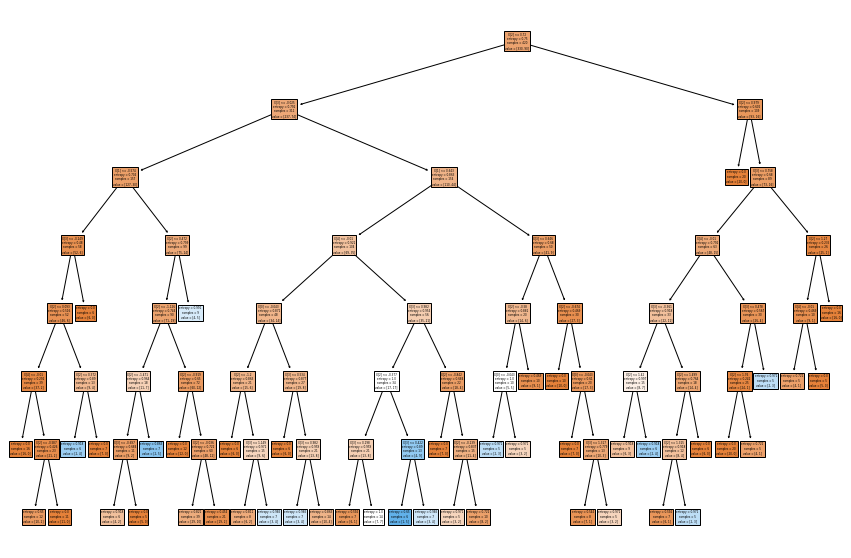

In [75]:
#Graphical Representation of 100th Decision Tree (estimator_[299])
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier.estimators_[299],filled=True)